In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve

In [2]:
bank = pd.read_csv('/datasets/Churn.csv')

In [3]:
bank.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


In [4]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


In [5]:
bank.shape

(10000, 14)

In [6]:
bank.sample(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
4839,4840,15649150,Buddicom,531,France,Female,53,5.0,127642.44,1,1,0,141501.45,1
2736,2737,15618225,Porter,741,Germany,Male,36,8.0,116993.43,2,1,0,168816.22,0
40,41,15619360,Hsiao,472,Spain,Male,40,4.0,0.00,1,1,0,70154.22,0
7700,7701,15715184,Capon,752,Spain,Female,31,4.0,144637.86,2,1,0,40496.72,0
6487,6488,15574283,Padovano,580,France,Male,31,NaN,0.00,2,0,1,64014.24,0
8854,8855,15630857,Wu,674,Spain,Female,39,6.0,0.00,2,1,1,9574.83,0
3150,3151,15795298,Olisaemeka,573,Germany,Female,35,9.0,206868.78,2,0,1,102986.15,0
3166,3167,15746203,Hsia,555,Germany,Male,62,4.0,119817.33,1,0,1,43507.10,1
3174,3175,15734312,Kang,577,Spain,Male,43,6.0,0.00,2,1,1,149457.81,0
9987,9988,15588839,Mancini,606,Spain,Male,30,8.0,180307.73,2,1,1,1914.41,0


In [7]:
bank['Tenure'] = bank['Tenure'].fillna(0).astype(int)

In [8]:
bank.sample(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9238,9239,15639133,Ku,773,France,Female,50,4,0.00,2,1,0,129372.94,0
3756,3757,15783541,Fomina,755,France,Male,31,5,0.00,2,0,1,194660.78,0
1254,1255,15610383,Dumetolisa,628,France,Female,46,1,46870.43,4,1,0,31272.14,1
8228,8229,15632609,Burdekin,554,France,Female,39,10,160132.75,1,1,0,32824.15,0
5894,5895,15648067,Onwuamaeze,583,France,Male,39,1,129299.28,2,1,0,73107.60,0


In [9]:
bank = bank.drop(['RowNumber'], axis=1)

In [10]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1015.8+ KB


In [11]:
#se identifico un error en la columna Surname, al tener una coma en uno de los datos, 
#por lo que al momento de procesarlo arrojaba un error de lectura, se reemplaza el nombre quitando la coma

found_in_cols = []
search_value = "Ch'ien"

for col in bank.columns:
    # Solo buscar en columnas que no sean numéricas para evitar errores de comparación
    if bank[col].dtype == 'object':
        if bank[col].astype(str).str.contains(search_value, case=False, na=False).any():
            found_in_cols.append(col)
    
if found_in_cols:
    print(f"El valor '{search_value}' fue encontrado en las columnas: {found_in_cols}")
else:
    print(f"El valor '{search_value}' no fue encontrado en ninguna columna de tipo 'object'.")

El valor 'Ch'ien' fue encontrado en las columnas: ['Surname']


In [12]:
#Se reemplaza para procesar los datos
bank_replace_surname = bank.copy()
bank_replace_surname['Surname'] = bank_replace_surname['Surname'].replace('Ch"ien', 'Chien')
display(bank_replace_surname.sample(10))

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
5716,15709478,P'an,611,Germany,Male,37,1,117524.72,2,0,1,161064.29,0
6089,15711316,Ch'ang,771,France,Male,27,2,0.00,2,1,1,199527.34,0
8279,15813283,Mai,605,France,Female,34,2,0.00,1,0,0,35982.42,0
314,15631868,Robertson,744,Spain,Male,36,2,153804.44,1,1,1,87213.33,0
8779,15650322,Grigoryeva,701,France,Female,34,3,105588.66,1,0,1,74694.41,0
5511,15714970,Holbrook,667,Germany,Male,32,0,103846.65,1,1,0,20560.69,0
2308,15611029,Hsiung,488,Germany,Female,33,4,140002.35,1,1,0,123613.81,0
142,15628145,Forwood,682,France,Female,43,5,125851.93,1,1,1,193318.33,0
2069,15790379,Rowe,629,Germany,Male,28,8,108601.00,1,1,1,119647.70,0
7863,15659677,Beluchi,746,France,Male,47,8,142382.03,1,1,1,62086.62,0


In [13]:
#aplicamos value_counts para conocer el porcentaje de cada situacion respecto a los clientes
bank_replace_surname['Exited'].value_counts(normalize=True)

0    0.7963
1    0.2037
Name: Exited, dtype: float64

**Se observa el conjunto de datos desbalanceado**

In [14]:
#aplicamos one hot encoding en todo el df, se utiliza Arbol de decision, mismo que arrojo el procentaje mas elevado
bank_replace_surname = pd.get_dummies(bank_replace_surname, drop_first=True)

target = bank_replace_surname['Exited']
features = bank_replace_surname.drop('Exited', axis=1)

#Dividir el dataset original en conjuntos de entrenamiento-validacion y prueba, en el mismo se considera el 20% en tamaño de prueba
features_train_val, features_test, target_train_val, target_test = train_test_split(features, target, test_size=0.20, random_state=54321)

#Despues, dividimos el conjunto construido en la primera linea, entrenamiento y validacion
# Para este caso se tiene el 80% del original, y queremos que la validación sea el 25% de eso lo que corresponde a (0.25 * 0.80 = 0.20 del total)

features_train, features_valid, target_train, target_valid = train_test_split(features_train_val, target_train_val, test_size=0.25, random_state=54321)

#entrenamos sin considerar el desequilibrio
model = DecisionTreeClassifier(random_state=12345)
model.fit(features_train, target_train)
predicted_valid = model.predict(features_valid)
accuracy_valid = accuracy_score(target_valid, predicted_valid)

print(accuracy_valid)

test_predictions = model.predict(features_test)
score_test = accuracy_score(target_test, test_predictions)
print(f'Exactitud del Arbol de Decision (Prueba): {score_test:.4f}')

0.8125
Exactitud del Arbol de Decision (Prueba): 0.8410


El porcentaje que nos arroja el modelo de entrenamiento sin considerar el equilibrio es muy elevado, lo que nos indica que puede ser engañoso, asumiendo que solo esta considerando los valores mas altos como los valores verdaderos, dejando de lado los demás, es por ello necesario utilizar metricas para corregir este valor a lo mas cercano a la realidad

In [15]:
#PRUEBA CON RANDOM FOREST CLASSIFIER, ARROJA 0.786
#aplicamos one hot encoding en todo el df
#bank_replace_surname = pd.get_dummies(bank_replace_surname, drop_first=True)

#target = bank_replace_surname['Exited']

#features = bank_replace_surname.drop('Exited', axis=1)
#features_train, features_valid, target_train, target_valid = train_test_split(
 #   features, target, test_size=0.25, random_state=12345
#)
#entrenamos sin considerar el desequilibrio
#model = RandomForestClassifier(random_state=12345, n_estimators = 100, max_depth = 5)
#model.fit(features_train, target_train)
#predicted_valid = model.predict(features_valid)
#accuracy_valid = accuracy_score(target_valid, predicted_valid)

#print(accuracy_valid)

**Balanceo de modelos utilizando f1 Score para conocer precision sin separar en conjuntos test, valid, train**

In [16]:
#Se aplica arbol de decision, para balancear el modelo
model_bal_dt = DecisionTreeClassifier(random_state=12345, max_depth = 5, class_weight = 'balanced')
model_bal_dt.fit(features_train, target_train)
predicted_valid = model_bal_dt.predict(features_valid)
print('F1:', f1_score(target_valid, predicted_valid))

test_predic_dt = model_bal_dt.predict(features_test)
score_test = f1_score(target_test, test_predic_dt)
print(f'Exactitud del Arbol de Decision (Prueba): {score_test:.4f}')

F1: 0.554730983302412
Exactitud del Arbol de Decision (Prueba): 0.5717


In [17]:
#aplicamos RandomForestClassifier como segunda opcion para balancear el modelo
model_bal_rf = RandomForestClassifier(random_state=12345, max_depth = 20, n_estimators = 100, class_weight = 'balanced')
model_bal_rf.fit(features_train, target_train)
predicted_valid = model_bal_rf.predict(features_valid)
print('F1:', f1_score(target_valid, predicted_valid))

test_predic_rf = model_bal_rf.predict(features_test)
score_test = f1_score(target_test, test_predic_rf)
print(f'Exactitud del RandomForest (Prueba): {score_test:.4f}')

F1: 0.5823293172690763
Exactitud del RandomForest (Prueba): 0.5893


**Separamos conjuntos train-test-valid**

In [18]:
#Utilizamos el arbol de decision en el conjunto de prueba balanceado
#Separamos el conjunto en validacion + prueba, considerando el 20% de prueba, el 80% se convierte en conjunto de entrenamiento-validacion
features_train_val, features_test, target_train_val, target_test = train_test_split(features, target, test_size=0.20, random_state=12345, stratify=target)
# en el segundo apartado, colocamos el conjunto de entrenamiento, test_size=0.25 de train_val significa 25% de 80% = 20% del total original
features_train, features_valid, target_train, target_valid = train_test_split(features_train_val, target_train_val, test_size=0.25, random_state=12345, stratify = target_train_val)

model_dtree = DecisionTreeClassifier(random_state=12345, max_depth = 5, class_weight =  'balanced')
model_dtree.fit(features_train, target_train)
predicted_valid = model_dtree.predict(features_valid)
print('F1:', f1_score(target_valid, predicted_valid))

dtree_predictions = model_dtree.predict(features_test)
dtree_score = f1_score(target_test, dtree_predictions)
print(f'Precision del DecisionTree (Prueba): {dtree_score:.4f}')

F1: 0.5618556701030928
Precision del DecisionTree (Prueba): 0.5553


In [19]:
#Utilizamos el RandomForest en el conjunto de prueba balanceado
#Separamos el conjunto en validacion + prueba, considerando el 20% de prueba, el 80% se convierte en conjunto de entrenamiento-validacion
features_train_val, features_test, target_train_val, target_test = train_test_split(features, target, test_size=0.20, random_state=12345, stratify=target)
# en el segundo apartado, colocamos el conjunto de entrenamiento, test_size=0.25 de train_val significa 25% de 80% = 20% del total original
features_train, features_valid, target_train, target_valid = train_test_split(features_train_val, target_train_val, test_size=0.25, random_state=12345, stratify = target_train_val)

model_rf = RandomForestClassifier(random_state=12345, n_estimators = 80, max_depth = 20, class_weight =  'balanced')
model_rf.fit(features_train, target_train)
predicted_valid = model_rf.predict(features_valid)
print('F1:', f1_score(target_valid, predicted_valid))

rf_predictions = model_rf.predict(features_test)
rf_score = f1_score(target_test, rf_predictions)
print(f'Precision del RandomForestClassifier (Prueba): {dtree_score:.4f}')

F1: 0.5912486659551762
Precision del RandomForestClassifier (Prueba): 0.5553


**Medicion de AUC ROC para ambos modelos**

In [20]:
#DecisionTree
prob_valid_dtree = model_dtree.predict_proba(features_valid)
prob_dtree_one_valid = prob_valid_dtree[:, 1]

auc_roc = roc_auc_score(target_valid, prob_dtree_one_valid)# < escribe el código aquí >

print(f'AUC-ROC:',auc_roc)

AUC-ROC: 0.8400920180581197


In [22]:
prob_test_dtree = model_dtree.predict_proba(features_test)
prob_dtree_one_test = prob_test_dtree[:, 1]

auc_roc_test_dtree = roc_auc_score(target_test, prob_dtree_one_test)# < escribe el código aquí >

print(f'AUC-ROC:',auc_roc_test_dtree)

AUC-ROC: 0.8383822960094146


In [23]:
#RandomForest
prob_valid_rf = model_rf.predict_proba(features_valid)
prob_one_valid_rf = prob_valid_rf[:, 1]

auc_roc_rf = roc_auc_score(target_valid, prob_one_valid_rf)

print(f'AUC-ROC:',auc_roc_rf)

AUC-ROC: 0.8381046686131431


In [24]:
prob_test_rf = model_rf.predict_proba(features_test)
prob_rf_one_test = prob_test_rf[:, 1]

auc_roc_test_rf = roc_auc_score(target_test, prob_rf_one_test)# < escribe el código aquí >

print(f'AUC-ROC:',auc_roc_test_rf)

AUC-ROC: 0.8353237675271574


*Se observa que el AUC para ambos casos (Decision Tree Classifier y Random Forest Classifier) tienen buena capacidad para distinguir entre los clientes que van a abandonar el banco y los que no, por el porcentaje que mostraron ambos casos.*

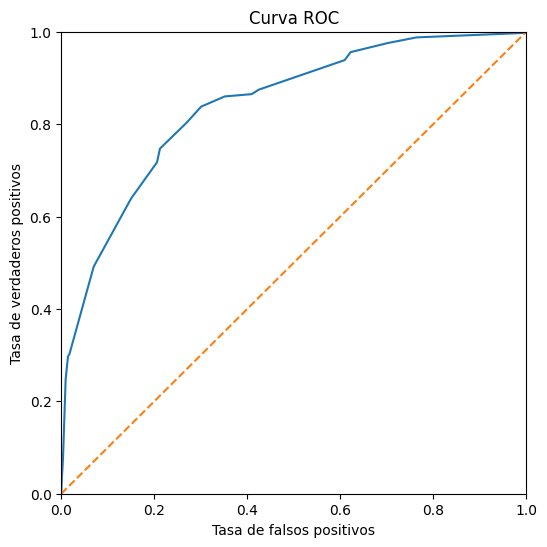

In [25]:
#Grafica ROC en conjunto DecisionTree
fpr, tpr, thresholds = roc_curve(target_valid, prob_dtree_one_valid)

plt.figure(figsize = (6,6))
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('Tasa de falsos positivos')
plt.ylabel('Tasa de verdaderos positivos')
plt.ylim([0.0, 1.0])
plt.xlim([0.0, 1.0])
plt.title('Curva ROC')
plt.show()

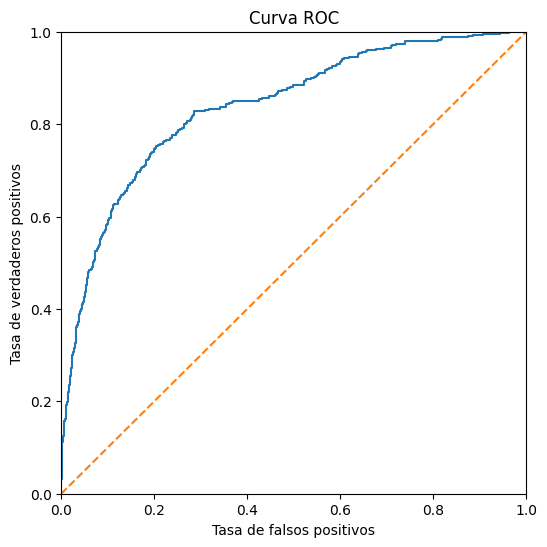

In [26]:
#Grafica ROC en conjunto de datos RandomForest
fpr, tpr, thresholds = roc_curve(target_valid, prob_one_valid_rf)

plt.figure(figsize = (6,6))
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('Tasa de falsos positivos')
plt.ylabel('Tasa de verdaderos positivos')
plt.ylim([0.0, 1.0])
plt.xlim([0.0, 1.0])
plt.title('Curva ROC')
plt.show()